## 2019 Novel Coronavirus Data Over Time

This is a really quick notebook to get people started with COVID-19 data analysis.ß

#### Data Source: John Hopkins University Center for Systems Science and Engineering

#### Notebook by: Nick Hopewell

To quote the main page: 

>"This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL)."


Data can be forked from the following repository: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

In [23]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
from datetime import datetime
from IPython.display import display

# file paths
cwd = os.getcwd()
daily_data_path = 'csse_covid_19_data/csse_covid_19_daily_reports/'
COVID_dir = os.path.join(cwd, daily_data_path)

# remove any non-csv files, strip file extension, sort by date of file
COVID_files = [i.rstrip('.csv') for i in os.listdir(COVID_dir) if i.endswith("csv")]
COVID_files.sort(key=lambda d: datetime.strptime(d, "%m-%d-%Y"))

# Set aside an empty df, columns to retain, and any constants we need to use for replacements
COVID_data = pd.DataFrame()
keep_cols = 'Country/Region Confirmed Deaths Recovered'.split()
C = 'China'
country_map = {'Country' : 
                   { 'Mainland China' : C, 
                     'Hong Kong' : C, 
                     'Hong Kong SAR' : C 
                   }
               }

# Read in all datasets in directory and concatenate them into one dataframe:
for file in COVID_files:
    try:
        _ = pd.read_csv(f'{COVID_dir}{file}.csv', usecols=keep_cols)
        _ = ( _
               .rename(columns={"Country/Region": "Country"})
               .replace(country_map)
               .assign(Date = file)
            )
    except ValueError:
        _ = pd.read_csv(f'{COVID_dir}{file}.csv')

        _ = ( _
               .rename(columns={"Country_Region": "Country/Region"})
               .filter(keep_cols)
               .rename(columns={"Country/Region": "Country"})
               .replace(country_map)
               .assign(Date = file)
            )

    COVID_data = pd.concat([COVID_data, _])

A quick look at the last 6 rows of the data I retrained:

In [24]:
# Most recent data
COVID_data.tail(6)

,Country,Confirmed,Deaths,Recovered,Date
3411,Uruguay,162.0,0.0,0.0,03-24-2020
3412,Uzbekistan,50.0,0.0,0.0,03-24-2020
3413,Venezuela,84.0,0.0,15.0,03-24-2020
3414,Vietnam,134.0,0.0,17.0,03-24-2020
3415,Zambia,3.0,0.0,0.0,03-24-2020
3416,Zimbabwe,3.0,1.0,0.0,03-24-2020


Filtering down to at sums for just China, the US, and Canada:

In [25]:
# countries to filter
countries = 'China Canada US'.split()

# summary query table
summary = (
    COVID_data
        .query('Country == @countries')
        .groupby(['Date', 'Country'])
        .agg('sum')
        .sort_values(
            by='Confirmed',
            ascending=True
        )
)

In [26]:
def display_more(df: pd.DataFrame, n_rows: str = None, n_cols: str = None): 
    """Temporarily increase IPython display settings"""
    if not n_rows: n_rows = 100
    if not n_cols: n_cols = 20
    
    with pd.option_context('display.max_rows', n_rows):
        with pd.option_context('display.max_columns', n_cols):
            display(df)
            
# grouped data sorted by confirmed cases over dates
display_more(summary, 200, 3)

,,Confirmed,Deaths,Recovered
Date,Country,,,
01-22-2020,US,1.0,0.0,0.0
01-23-2020,US,1.0,0.0,0.0
01-26-2020,Canada,1.0,0.0,0.0
01-27-2020,Canada,1.0,0.0,0.0
01-24-2020,US,2.0,0.0,0.0
01-25-2020,US,2.0,0.0,0.0
01-29-2020,Canada,2.0,0.0,0.0
01-28-2020,Canada,2.0,0.0,0.0
01-31-2020,Canada,3.0,0.0,0.0


And now only Canada:

In [89]:
# data just for canada to plot
canada_data = (
    summary
        .query('Country == "Canada"')
        .reset_index()
)

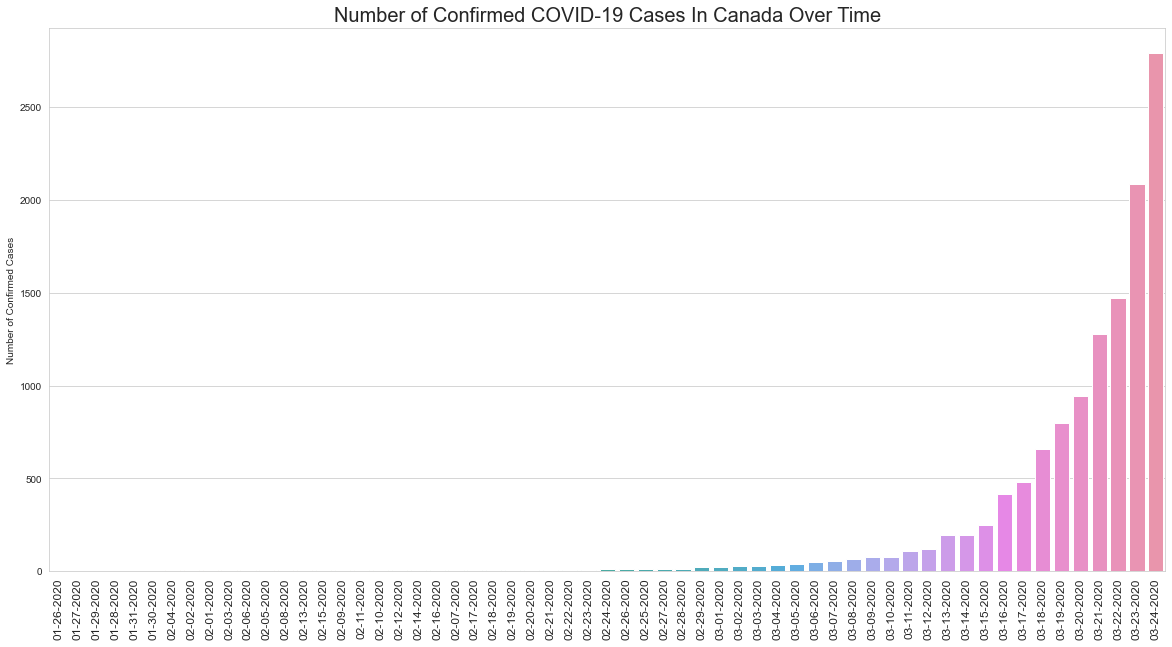

In [100]:
# simple bar plot
with sns.axes_style("whitegrid"):
    canada_bar = sns.barplot(
        data=canada_data, 
        x='Date', 
        y='Confirmed')
    canada_bar.set_xticklabels(
            canada_bar.get_xticklabels(), 
            rotation=90, fontsize=12)
    canada_bar.set(ylabel="Number of Confirmed Cases", xlabel="")
    canada_bar.set_title(
        "Number of Confirmed COVID-19 Cases In Canada Over Time",
         fontsize=20
    )
